# Section 5.3: Reverts per page (setup and exploratory)

This is a data analysis script used to produce findings in the paper, which you can run based entirely off the files in this GitHub repository. This notebook produces part of the analysis for all languages, and the notebook `4-3-reverts-per-page-enwiki-plots` is an independent replication of this analysis in R that contains plots for the English Wikipedia, which are included in the paper. Note that the R notebook cannot be run on mybinder due to memory requirements, while this one can be.

This entire notebook can be run from the beginning with Kernel -> Restart & Run All in the menu bar. It takes less than 1 minute to run on a laptop running a Core i5-2540M processor.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import datetime
import pickle
%matplotlib inline

In [2]:
start = datetime.datetime.now()

## Load data

In [3]:
!unxz --keep --force ../../datasets/parsed_dataframes/df_all_2016.pickle.xz

In [4]:
!ls ../../datasets/parsed_dataframes/*.pickle

../../datasets/parsed_dataframes/df_all_2016.pickle


In [5]:
with open("../../datasets/parsed_dataframes/df_all_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

In [6]:
df_all.sample(2).transpose()

,368803,502072
archived,False,False
language,en,en
page_namespace,4,14
rev_deleted,False,False
rev_id,414658262,321587772
rev_minor_edit,False,True
rev_page,4626266,21490082
rev_parent_id,4.14656e+08,2.70317e+08
rev_revert_offset,1,2
rev_sha1,b7q4j3lf6nvbgdxpcioi5th06y4zvjd,20jlq5xvki3aa9pq17i7tiklcylri18


## Number of reverts per page per bot pair
### Group by language, page ID, and botpair_sorted
Grouping by these three columns creates a very simple and useful intersection for this metric. If there is only one revert for a language/page ID/botpair_sorted set, then the reverting bot's revert was for sure unreciprocated by the reverted bot. If there are two reverts, then the most likely outcome is that the reverting bot's revert was followed by a revert by the reverted bot, although this could also mean that the reverting bot reverted the reverted bot twice. Higher counts imply heavy back-and-forth reverts between two bots on a single page.

We count the number of reverts with the same language, page ID, and sorted botpair, then assign that value to `reverts_per_page_botpair_sorted` for every revert matching these three columns. Note that this initial analysis is conducted in `0-load-process-data.ipynb`, but we have included it again for clarity.

In [7]:
groupby_lang_page_bps = df_all.groupby(["language", "rev_page", "botpair_sorted"])

In [8]:
df_groupby = pd.DataFrame(groupby_lang_page_bps['rev_id'].count()).reset_index().rename(columns={"rev_id":"reverts_per_page_botpair_sorted"})
df_groupby.sample(25)

,language,rev_page,botpair_sorted,reverts_per_page_botpair_sorted
413723,en,33088615,"['KLBot2', 'Thijs!bot']",1
608235,fr,3232951,"['ChuispastonBot', 'EmausBot']",1
221343,en,13258304,"['AvicBot', 'Xqbot']",1
1742,de,11128,"['MerlIwBot', 'Xqbot']",2
611017,fr,3637910,"['Addbot', 'YFdyh-bot']",1
780878,zh,1421963,"['Addbot', 'Mjbmrbot']",1
2115,de,15235,"['MerlIwBot', 'PixelBot']",2
698010,pt,241700,"['EmausBot', 'MerlIwBot']",1
710941,pt,1028990,"['CommonsDelinker', 'Rei-bot']",1
593680,fr,1718027,"['HerculeBot', 'Ptbotgourou']",1


### Add reverts_per_page_botpair_sorted to df_all

In [9]:
df_all = df_all.drop("reverts_per_page_botpair_sorted",1)
    
    

df_all = pd.merge(df_all, df_groupby, how='left',
         left_on=["language", "rev_page", "botpair_sorted"],
         right_on=["language", "rev_page", "botpair_sorted"])

## Analysis
### Number of reverts by revert_per_page_botpair_sorted, all languages, articles only

For example, 528,104 reverts were not reciprocated at all. 25,528 reverts were part of a two-bot revert chain on the same page in the same language lasting 2 reverts. 3,987 reverts were part of a two-bot revert chain in the same page in the same language lasting 3 reverts, and so on.

In [10]:
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sort_index()

1     528104
2      25528
3       3987
4       1212
5        540
6        336
7        259
8        176
9        135
10        60
11        44
12        96
13       143
14        70
15        90
16        80
17        85
18        54
19        95
20        20
21        42
22        88
23       138
24        72
28        56
29        87
30        90
31        93
35        35
39        39
41        82
Name: reverts_per_page_botpair_sorted, dtype: int64

In [11]:
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sum()

561936

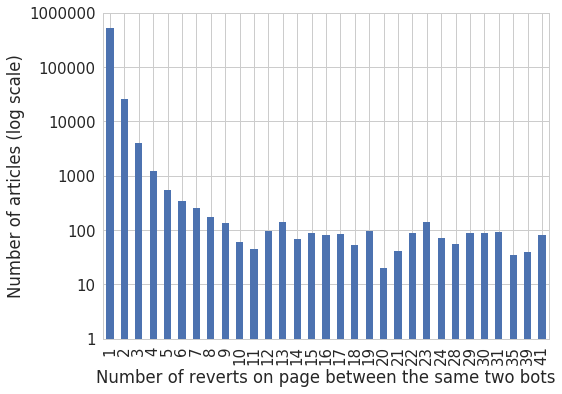

In [12]:
import matplotlib.ticker

sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=[8,6])
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_yscale('log')
ax.set_ylim((pow(10,0),pow(10,6)))
ax.set_ylabel("Number of articles (log scale)")
ax.set_xlabel("Number of reverts on page between the same two bots")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))

### Number of reverts by revert_per_page_botpair_sorted, English only, articles only


In [13]:
df_all.query("page_namespace == 0 and language=='en'").reverts_per_page_botpair_sorted.value_counts().sort_index()

1     228198
2      13012
3       1860
4        476
5        120
6         24
7         28
8         32
9         27
10        10
11        11
13        39
14        28
15        60
16        16
17        51
18        54
19        38
20        20
21        21
22        22
23        92
24        72
28        56
29        87
30        90
31        93
35        35
39        39
41        82
Name: reverts_per_page_botpair_sorted, dtype: int64

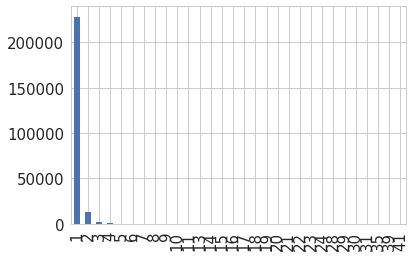

In [14]:
sns.set(font_scale=1.5, style="whitegrid")
df_all.query("page_namespace == 0 and language == 'en'").reverts_per_page_botpair_sorted.value_counts().sort_index().plot(kind='bar')

### Checking that the sum of the counts and the total number of reverts are the same

In [15]:
df_all.query("page_namespace == 0 and language=='en'").reverts_per_page_botpair_sorted.value_counts().sum()

244793

In [16]:
len(df_all.query("page_namespace == 0 and language=='en'"))

244793

## Finding pages with more than 500 reverts by/on the same bots

In [17]:
gb = df_all.query("reverts_per_page_botpair_sorted > 500").groupby(["language", "page_namespace", "rev_page", "botpair_sorted"])

In [18]:
gb['rev_id'].count()

language  page_namespace  rev_page  botpair_sorted                              
en        4               974956    ['AnomieBOT', 'Legobot']                          521
                          4626266   ['ClueBot NG', 'HBC AIV helperbot']              2047
                                    ['ClueBot NG', 'HBC AIV helperbot11']            2538
                                    ['ClueBot NG', 'HBC AIV helperbot5']             8723
                                    ['ClueBot NG', 'HBC AIV helperbot7']            10473
                                    ['ClueBot', 'HBC AIV helperbot2']                1002
                                    ['ClueBot', 'HBC AIV helperbot3']                5822
                                    ['ClueBot', 'HBC AIV helperbot4']                1545
                                    ['ClueBot', 'HBC AIV helperbot5']                3007
                                    ['ClueBot', 'HBC AIV helperbot7']                4110
                   

From a manual lookup:

page_id	page_title
- 974956	[Possibly_unfree_files](http://enwp.org/Wikipedia:Administrator_intervention_against_vandalism/TB2)
- 4626266	[Administrator_intervention_against_vandalism/TB2](http://enwp.org/Wikipedia:Administrator_intervention_against_vandalism/TB2)
- 5964327	[Suspected_copyright_violations](http://enwp.org/Wikipedia:Suspected_copyright_violations)
- 11005908	[Tutorial/Editing/sandbox](http://enwp.org/Wikipedia:Tutorial/Editing/sandbox)
- 11238105	[Usernames_for_administrator_attention/Bot](http://enwp.org/Wikipedia:Usernames_for_administrator_attention/Bot)

### How many total bot-bot reverts in these pages?

In [19]:
len(df_all.query("language == 'en' and rev_page == 4626266"))

55739

In [20]:
len(df_all.query("language == 'en' and rev_page == 11238105"))

18919

In [21]:
len(df_all.query("language == 'en' and rev_page == 5964327"))

3659

### Median time to revert for a Mathbot-curated list

In [22]:
df_all.query("language == 'en' and rev_page == 5971841").groupby("botpair")['time_to_revert_days'].median()

botpair
FrescoBot rv Mathbot    36.399456
Mathbot rv DrilBot       0.556840
Mathbot rv FrescoBot     0.670440
Mathbot rv Yobot         0.944352
Yobot rv Mathbot        12.057517
Name: time_to_revert_days, dtype: float64

## Runtime

In [23]:
end = datetime.datetime.now()

time_to_run = end - start
minutes = int(time_to_run.seconds/60)
seconds = time_to_run.seconds % 60
print("Total runtime: ", minutes, "minutes, ", seconds, "seconds")

Total runtime:  0 minutes,  16 seconds
